# Experimentacion Luus-Jaakola vs MonteCarlo
Codigo para correr la comparacion Luus-Jaakola contra MonteCarlo. Completar con sus funciones correspondientes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # para tener barras de progreso


def error_relativo(x,y):
    raise NotImplementedError()

def normaP(x, p):
    raise NotImplementedError()

def normaliza(X, p):
    raise NotImplementedError()

def multiplica(A, X):
    # por velocidad para experimentacion, pero no hagan esto!
    return A @ X
    raise NotImplementedError()

def unit_points(A, p, n=1000):
    xs = np.random.randn(A.shape[1], n)
    xs = normaliza(xs, p) 
    ys = multiplica(A, xs)
    return xs, ys


# Recordatorio de la clase pasada

La norma $q,p$ inducida de una matriz $A \in \mathbb{R}^{m \times n}$ se define como

$$
\|A\|_{q,p} = \max_{x \,/\, \|x\|_p = 1} \, \|Ax\|_q
$$

Se propusieron 2 algoritmos numericos para estimar $\|A\|_{q,p}$


## Monte Carlo
Función normaMatMC(A, q, p, Np):

    Generar Np vectores aleatorios de dimensión n:
       xs ← vectores ~ N(0,I) (o cualquier otra distribucion que cubra todas las direcciones)

    Normalizar cada vector xs según la norma p:
       xs ← normaliza(xs, p)

    Multiplicar la matriz A por cada vector xs:
       ys ← A x xs

    Buscar el que tenga mayor norma
       best ← max norma_q(yi)

    Retornar best


## Luus-Jaakola
Función normaMatLJ(A,q,p,Np,maxiter,variacion,rate):

    Inicializar x0 aleatorio y normalizado
    best_x ← x0
    best_norm ← ||A * best_x||_q
    
    Para iteración = 1 hasta maxiter:
        xs ← Np vectores alrededor de best_x y normalizarlos
        ys ← A x xs
        norma_max ← max norma_q(yi)
        Si norma_max > best_norm:
            best_x ← xi correspondiente a norma_max
            best_norm ← norma_max
        Sino:
            reducir la variación
    Retornar best


In [ ]:

def normaMatMC(A, q, p, Np):
    # Implementar!
    raise NotImplementedError()


def normaMatLJ(A,q,p,Np,maxiter=1000,variacion=2,rate=0.95):
    # Implementar!
    # Para esta experimentacion diferimos ligeramente de la version de la guia
    # Se debe devolver un tupla de 3 cosas en este orden
    # 1. x que encontramos que maximiza la norma
    # 2. La norma de Ax, la mejor solucion encontrada
    # 3. El historial de mejores vectores encontrados como lista de vectores Ax

    raise NotImplementedError()

    return best_x, best_x_norm, history


# LJ en vivo

In [6]:
def normaMatLJ_test(A=None,p_norm=2):
    if A is None:
        A = np.random.rand(2,2)*2-1
    _, _, history  = normaMatLJ(A, p_norm, p_norm, Np=2, maxiter=10, variacion=2)

    xs, ys = unit_points(A, p_norm, 10000)

    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
    
    axes[1].scatter(ys[0,:], ys[1,:], alpha=0.1, s=1)
    axes[0].set_xlabel("Espacio X")
    axes[1].set_xlabel("Espacio AX")

    axes[0].scatter(xs[0,:], xs[1,:], alpha=0.1, s=1)
    for elem in history:
        y = elem
        axes[1].arrow(0, 0, y[0], y[1], head_length=0.1, color='red')
        axes[1].scatter(y[0], y[1])

        x = np.linalg.inv(A) @ y
        
        axes[0].arrow(0, 0, x[0], x[1], head_length=0.1, color='green')
        axes[0].scatter(x[0], x[1])

    axes[0].set_aspect('equal', adjustable='box')
    axes[1].set_aspect('equal', adjustable='box')
    plt.show()
    plt.clf()

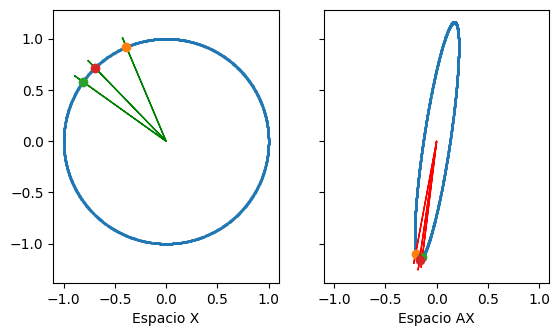

<Figure size 640x480 with 0 Axes>

In [7]:
normaMatLJ_test()

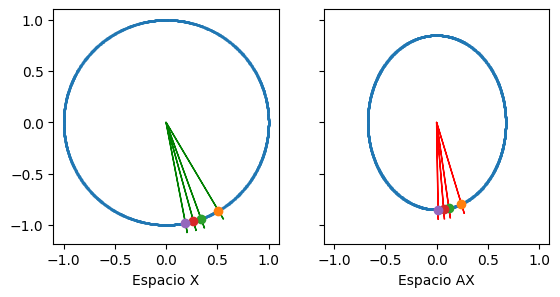

<Figure size 640x480 with 0 Axes>

In [8]:
normaMatLJ_test(p_norm=2)

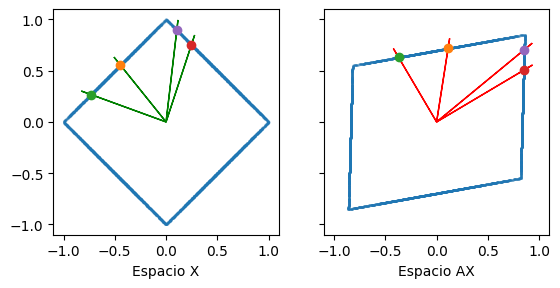

<Figure size 640x480 with 0 Axes>

In [26]:
normaMatLJ_test(p_norm=1)

# Comparacion de metodos para encontrar norma
Tenemos 2 metodos para intentar hallar la norma de una matriz. ¿Como sabemos su calidad? ¿Cual es mas eficiente? ¿Importa segun las caracteristicas de la matriz?

¡Hay que experimentar!

Una medida de perfomance comun a ambos metodos: La cantidad de evaluaciones de $Ax$ que utlizan

¿Como cambia la performance para diferentes matrizes? ¿Cambia con la dimension? ¿Y el max iters?

In [ ]:

ns = [2,5,10,20,50,100] # las dims que vamos a probar
num_matrizes = 100 # cuantas matrices por dim a probar se usan
def normaMatLJ_study(p,Np,maxiter=100,variacion=2,rate=0.95):
    errors = []
    for n  in tqdm(ns):
        errors_n = []

        for k in range(num_matrizes):
            A = np.random.rand(n,n)*2-1
            _, l, _ = normaMatLJ(A, p, p, Np, maxiter=maxiter, variacion=variacion, rate=rate)
            true_norm =  np.linalg.norm(A, p)
            errors_n.append(error_relativo(true_norm, l))

        errors.append(errors_n)

    errors = np.array(errors)

    return ns, errors
    
def normaMatMC_study(p,Np):
    errors = []
    for n  in tqdm(ns):
        errors_n = []
        for k in range(num_matrizes):
            A = np.random.rand(n,n)*2-1
            l = normaMatMC(A, p, p, Np)
            true_norm =  np.linalg.norm(A, p)
            errors_n.append(error_relativo(true_norm, l))

        errors.append(errors_n)

    errors = np.array(errors)

    return ns, errors

In [17]:
errors_lj = []
errors_mc = []
max_iters_sweep = [10, 20, 30]
n_per_iter=100
for maxiter in  max_iters_sweep:
    ns, errors = normaMatLJ_study(2, n_per_iter, maxiter)
    errors_lj.append(errors)
errors_lj = np.array(errors_lj)


100%|█████████████████████████████████████████████| 6/6 [01:30<00:00, 15.06s/it]


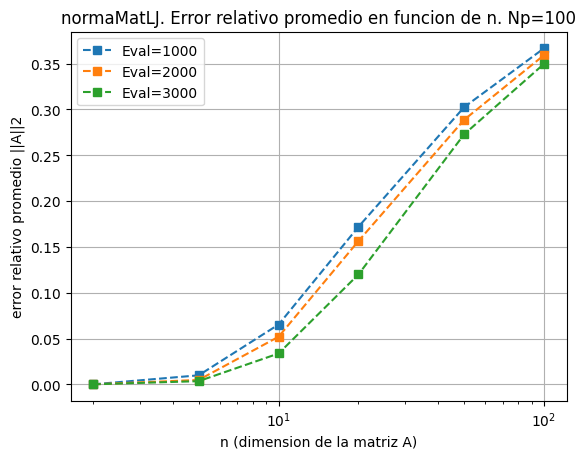

In [18]:

for errors, maxiter in zip(errors_lj, max_iters_sweep):
    plt.plot(ns, np.mean(errors,axis=1), label=f'Eval={maxiter*n_per_iter}', marker='s',linestyle='--', )
    plt.xlabel('n (dimension de la matriz A)')
    plt.ylabel('error relativo promedio ||A||2')
    plt.title(f'normaMatLJ. Error relativo promedio en funcion de n. Np={n_per_iter}')
    plt.legend()
plt.xscale("log")
plt.grid()

plt.show()

In [19]:
errors_mc = []
for maxiter in  max_iters_sweep:
    ns, errors = normaMatMC_study(2, maxiter*n_per_iter)
    errors_mc.append(errors)
errors_mc = np.array(errors_mc)

100%|█████████████████████████████████████████████| 6/6 [01:38<00:00, 16.46s/it]


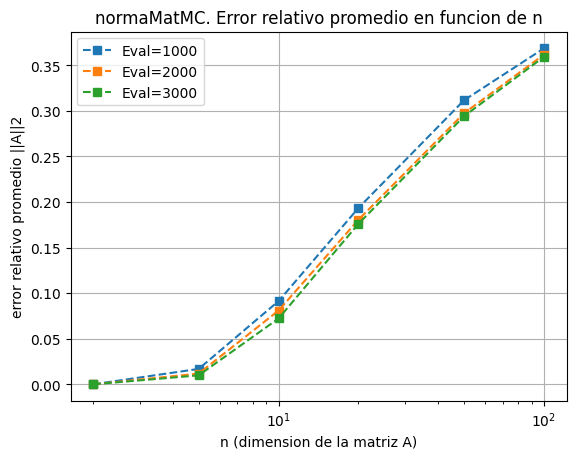

In [20]:
for errors, maxiter in zip(errors_mc, max_iters_sweep):
    plt.plot(ns, np.mean(errors,axis=1), label=f'Eval={maxiter*n_per_iter}', marker='s',linestyle='--', )

plt.xlabel('n (dimension de la matriz A)')
plt.ylabel('error relativo promedio ||A||2')
plt.title('normaMatMC. Error relativo promedio en funcion de n')
plt.legend()
plt.xscale("log")
plt.grid()

plt.show()

### Comparemos ambos metodos

$$
\text{Ganancia} = \frac{\text{MC - LJ}}{\text{MC}} \, \cdot 100
$$


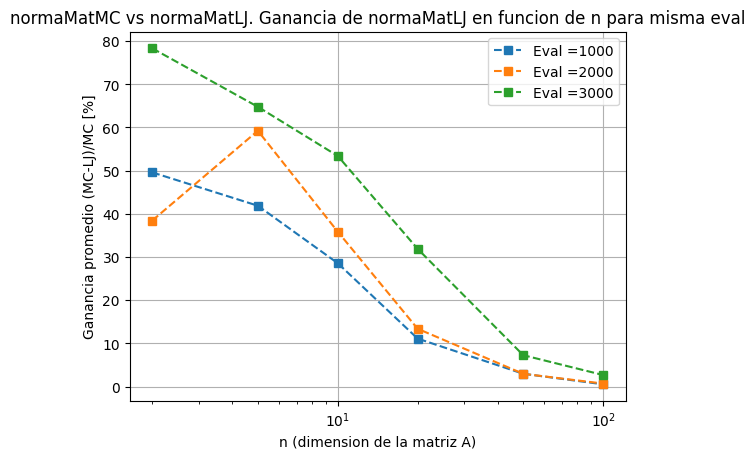

In [21]:
for lj, mc, maxiter in zip(errors_lj, errors_mc, max_iters_sweep):
    plt.plot(ns, 100*(np.mean(mc,axis=1)-np.mean(lj,axis=1))/np.mean(mc,axis=1),marker='s',linestyle='--', label= 'Eval =' + str(maxiter*n_per_iter))
plt.xlabel('n (dimension de la matriz A)')
plt.ylabel('Ganancia promedio (MC-LJ)/MC [%]')
plt.title('normaMatMC vs normaMatLJ. Ganancia de normaMatLJ en funcion de n para misma eval')

plt.legend()
plt.xscale("log")

plt.grid()
plt.show()

¿Significa esto que LJ solo sirve por sobre MC para dimensiones bajas? **No!!**, pero si que para **este** tipo de matrizes *en promedio* **esta** configuracion de evaluaciones LJ es lo mismo que MC cuando tenemos matrizes de 100x100. 

Un par de  criticas validas. 
- ¿Reflejan la forma que generamos las matrizes para este experimento las que nos interesan? ¿Que pasa si nos interesan matrizes no inversibles?
- LJ tiene 2 parametros que determinan la cantidad de evaluaciones, max_iters y Np.  Multiples configuraciones son psobibles con el mismo numero de evaliaciones. Para este analisis mantuvimos Np fijo
- ¿Y que sucede con otras normas?
- El promedio de matrizes usado es muy bajo. Hay demasiado ruido

Para pensar. ¿Porque creen que el error crece con la dimensionalidad? ¿Como crece la norma?

In [22]:
mean_norm = []
for n  in tqdm(ns):
    errors_n = []
    for k in range(1000):
        A = np.random.rand(n,n)
        true_norm =  np.linalg.norm(A, ord=2)
        errors_n.append(true_norm)
    mean_norm.append(np.mean(errors_n))    


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.95it/s]


Text(0.5, 1.0, 'Crecimiento de ||A||2 con n')

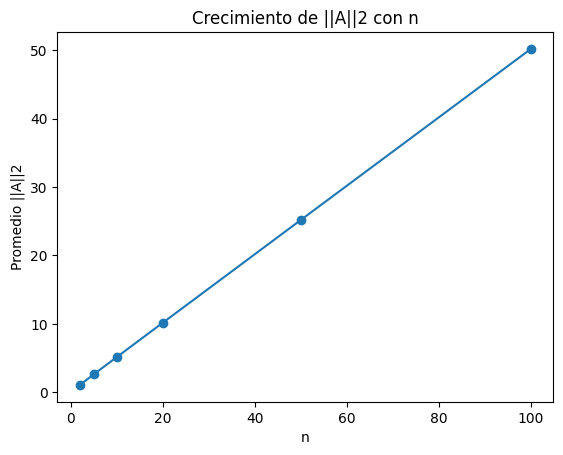

In [23]:
plt.plot(ns, mean_norm , marker="o")
plt.xlabel('n')
plt.ylabel('Promedio ||A||2')
plt.title('Crecimiento de ||A||2 con n')